<img src = 'CL_Metrics_1.PNG'/>

In a classification problem statement, we can either predict as labels or predict as probabilites. When predicting labels, by default if probability is greater than 0.5 it is B class and less than or equal to 0.5 says it as A class. But while predicting in probabilities, the threshold plays a crucial role. Depending on the usecase, the threshold may increase or decrease than 0.5 to an optimal value. This threshold is obtained by using ROC curve and AUC scores.

Till 70-30% class distribution we can take the dataset as balanced. Less than that we generally consider it as imbalanced dataset. For balanced dataset, the metric to be used is accuracy. For imbalanced dataset, the metrics used are precision, recall and fbeta score

When false positives are okay, we use recall as the metric (ex. Medical, cancer model). Spam falls under need of precision where false positives are not okay. When both false positives and false negatives have equal weightage, we use f-beta score. 

In F-Beta, the Beta value varies. The F1 score is also known as harmonic mean. When FP and FN both have equal impact, use Beta value as 1. FP > FN impact, reduce the beta value. Usually resort to 0.5 but it can vary between 0 and 1. FN > FP impact, increase the beta value. Resort to 2, but the value ranges between 1 to 10.

<img src = 'CL_Metrics_2.PNG'/>

In a ROC curve, the more the area under the curve (AUC), the better the model is performing. The diagonal line in the above pic is the average line. A good model curve should never go below this diagonal curve, otherwise it's a dumb model. ROC curve is drawn using three things. Threshold, TPR and FPR. Based on the ROC curve and seeing the TPR and FPR scores, upon domain expert's opinion on TPR and FPR, we can select the appropriate threshold for the model. 

### Selecting the Right threshold using ROC curve

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# roc curve and auc score
from sklearn.datasets import make_classification

C:\Users\Joshua Amresh\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from sklearn.model_selection import train_test_split
X, y = make_classification(n_samples=2000, n_classes=2, weights=[1,1], random_state=1)

In [3]:
X.shape

(2000, 20)

In [5]:
y

array([0, 0, 0, ..., 1, 1, 0])

In [6]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [7]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

##### Random Forest

In [8]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
ytrain_pred = rf_model.predict_proba(X_train)
print('RF train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = rf_model.predict_proba(X_test)
print('RF test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

RF train roc-auc: 0.9999999999999999
RF test roc-auc: 0.9816444444444445


In [9]:
ytrain_pred

array([[1.  , 0.  ],
       [0.98, 0.02],
       [0.01, 0.99],
       ...,
       [0.99, 0.01],
       [0.98, 0.02],
       [0.3 , 0.7 ]])

##### Logistic Regression

In [10]:
from sklearn.linear_model import LogisticRegression
log_classifier=LogisticRegression()
log_classifier.fit(X_train, y_train)
ytrain_pred = log_classifier.predict_proba(X_train)
print('Logistic train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = log_classifier.predict_proba(X_test)
print('Logistic test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

Logistic train roc-auc: 0.9863568922694498
Logistic test roc-auc: 0.9885777777777777


##### Adaboost classifier

In [11]:
from sklearn.ensemble import AdaBoostClassifier
ada_classifier=AdaBoostClassifier()
ada_classifier.fit(X_train, y_train)
ytrain_pred = ada_classifier.predict_proba(X_train)
print('Adaboost train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = ada_classifier.predict_proba(X_test)
print('Adaboost test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

Adaboost train roc-auc: 0.9975081174960356
Adaboost test roc-auc: 0.9826111111111111


##### KNN Classifier

In [12]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier=KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)
ytrain_pred = knn_classifier.predict_proba(X_train)
print('Adaboost train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = knn_classifier.predict_proba(X_test)
print('Adaboost test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

Adaboost train roc-auc: 0.981670071491109
Adaboost test roc-auc: 0.9426111111111111


##### Select best threshold for max accuracy

In [15]:
pred=[]
for model in [rf_model,log_classifier,ada_classifier,knn_classifier]:
    pred.append(pd.Series(model.predict_proba(X_test)[:,1]))
final_prediction=pd.concat(pred,axis=1).mean(axis=1)
print('Ensemble test roc-auc: {}'.format(roc_auc_score(y_test,final_prediction)))

Ensemble test roc-auc: 0.9853111111111111


In [16]:
pred

[0      1.00
 1      0.02
 2      0.99
 3      0.93
 4      0.62
        ... 
 595    0.01
 596    0.02
 597    1.00
 598    0.01
 599    0.99
 Length: 600, dtype: float64, 0      0.991861
 1      0.000008
 2      0.966929
 3      0.761539
 4      0.779443
          ...   
 595    0.024239
 596    0.000003
 597    0.984385
 598    0.001147
 599    0.989540
 Length: 600, dtype: float64, 0      0.559186
 1      0.463282
 2      0.538202
 3      0.509875
 4      0.490344
          ...   
 595    0.461121
 596    0.441377
 597    0.532403
 598    0.441720
 599    0.559890
 Length: 600, dtype: float64, 0      1.0
 1      0.0
 2      0.8
 3      0.8
 4      0.4
       ... 
 595    0.0
 596    0.0
 597    1.0
 598    0.2
 599    0.8
 Length: 600, dtype: float64]

In [17]:
pd.concat(pred,axis=1)

,0,1,2,3
0,1.00,0.991861,0.559186,1.0
1,0.02,0.000008,0.463282,0.0
2,0.99,0.966929,0.538202,0.8
3,0.93,0.761539,0.509875,0.8
4,0.62,0.779443,0.490344,0.4
...,...,...,...,...
595,0.01,0.024239,0.461121,0.0
596,0.02,0.000003,0.441377,0.0
597,1.00,0.984385,0.532403,1.0
598,0.01,0.001147,0.441720,0.2


In [18]:
final_prediction

0      0.887762
1      0.120823
2      0.823783
3      0.750353
4      0.572447
         ...   
595    0.123840
596    0.115345
597    0.879197
598    0.163217
599    0.834857
Length: 600, dtype: float64

In [19]:
y_test

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,

In [20]:
#### Calculate the ROc Curve


fpr, tpr, thresholds = roc_curve(y_test, final_prediction)
thresholds

array([1.91188114, 0.91188114, 0.90656694, 0.90327475, 0.80556516,
       0.8030558 , 0.80037052, 0.79912833, 0.78817698, 0.78571156,
       0.75614847, 0.75537124, 0.72430851, 0.72137362, 0.70347576,
       0.69893711, 0.65787883, 0.65743537, 0.61244697, 0.61175354,
       0.6115152 , 0.60614346, 0.59327749, 0.58736186, 0.57244674,
       0.56800386, 0.54845371, 0.53719563, 0.52605932, 0.49616892,
       0.45240225, 0.44472765, 0.4421034 , 0.39818654, 0.39379719,
       0.34268074, 0.34086612, 0.23469741, 0.23390421, 0.19644743,
       0.19348417, 0.12638785, 0.1253351 , 0.10625332])

In [21]:
from sklearn.metrics import accuracy_score
accuracy_ls = []
for thres in thresholds:
    y_pred = np.where(final_prediction>thres,1,0)
    accuracy_ls.append(accuracy_score(y_test, y_pred, normalize=True))
    

In [22]:
accuracy_ls

[0.5,
 0.5,
 0.5116666666666667,
 0.5133333333333333,
 0.8066666666666666,
 0.8083333333333333,
 0.81,
 0.8116666666666666,
 0.83,
 0.8316666666666667,
 0.8666666666666667,
 0.8683333333333333,
 0.9116666666666666,
 0.9133333333333333,
 0.92,
 0.9216666666666666,
 0.9333333333333333,
 0.935,
 0.9433333333333334,
 0.945,
 0.9433333333333334,
 0.945,
 0.945,
 0.9466666666666667,
 0.955,
 0.9566666666666667,
 0.9583333333333334,
 0.9583333333333334,
 0.9583333333333334,
 0.9583333333333334,
 0.96,
 0.9616666666666667,
 0.96,
 0.95,
 0.9483333333333334,
 0.94,
 0.9383333333333334,
 0.8766666666666667,
 0.8766666666666667,
 0.84,
 0.8383333333333334,
 0.695,
 0.6933333333333334,
 0.5016666666666667]

In [23]:

accuracy_ls = pd.concat([pd.Series(thresholds), pd.Series(accuracy_ls)],
                        axis=1)
accuracy_ls.columns = ['thresholds', 'accuracy']
accuracy_ls.sort_values(by='accuracy', ascending=False, inplace=True)
accuracy_ls.head()

,thresholds,accuracy
31,0.444728,0.961667
32,0.442103,0.960000
30,0.452402,0.960000
29,0.496169,0.958333
28,0.526059,0.958333


In [24]:
accuracy_ls

,thresholds,accuracy
31,0.444728,0.961667
32,0.442103,0.960000
30,0.452402,0.960000
29,0.496169,0.958333
28,0.526059,0.958333
27,0.537196,0.958333
26,0.548454,0.958333
25,0.568004,0.956667
24,0.572447,0.955000
33,0.398187,0.950000


In [25]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

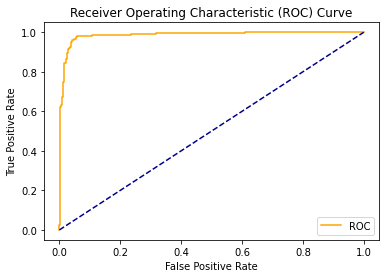

In [26]:
plot_roc_curve(fpr,tpr)

### Metrics for multi class classification problem

In [27]:
from sklearn import metrics

In [28]:
C="Cat"
D="Dog"
F="Fox"

The precision for the cat class is the number of correctly predicted cat out of all predicted cat

The recall for cat is the number of correctly predicted cat out of the number of actual cat

In [29]:
#true values
y_true = [C,C,C,C,C,C, F,F,F,F,F,F,F,F,F,F, D,D,D,D,D,D,D,D,D]

#predicted values
y_pred = [C,C,C,C,D,F, C,C,C,C,C,C,D,D,F,F, C,C,C,D,D,D,D,D,D]

#print confusion matrix
print(metrics.confusion_matrix(y_true, y_pred))

#print other metrics
print(metrics.classification_report(y_true, y_pred))

[[4 1 1]
 [3 6 0]
 [6 2 2]]
              precision    recall  f1-score   support

         Cat       0.31      0.67      0.42         6
         Dog       0.67      0.67      0.67         9
         Fox       0.67      0.20      0.31        10

    accuracy                           0.48        25
   macro avg       0.55      0.51      0.47        25
weighted avg       0.58      0.48      0.46        25



Unless and until the problem is a binary classification, TP TN FP FN will not work. In multiclass have to go with the strategy of one vs rest. 

### Gain and Lift curves

<img src = 'Lift_1.PNG'/>

Consider the example of a company doing a mail marketing campaign to get responses from the customers as shown below

<img src = 'Lift_2.PNG'/>

<img src = 'Lift_3.PNG'/>

<img src = 'Lift_4.PNG'/>

<img src = 'Lift_5.PNG'/>

<img src = 'Lift_6.PNG'/>